In [1]:
import pandas as pd

In [2]:
BSinfo = pd.read_csv('..\..\Dataset\BSinfo.csv')
CLdata = pd.read_csv('..\..\Dataset\CLdata.csv')
ECdata = pd.read_csv('..\..\Dataset\ECdata.csv')

In [3]:
CLdata

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0,0,0.0,0.0
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0,0,0.0,0.0
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0,0,0.0,0.0
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0,0,0.0,0.0
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_745,Cell3,0.071000,0.0,0.0,0.0,0,0.0,0.0
125571,1/2/2023 20:00,B_745,Cell3,0.064962,0.0,0.0,0.0,0,0.0,0.0
125572,1/2/2023 21:00,B_745,Cell3,0.081865,0.0,0.0,0.0,0,0.0,0.0
125573,1/2/2023 22:00,B_745,Cell3,0.097615,0.0,0.0,0.0,0,0.0,0.0


In [5]:
BSinfo

,BS,CellName,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,B_0,Cell0,Type1,Mode2,365.000,20,4,6.875934
1,B_1,Cell0,Type2,Mode2,532.000,20,4,6.875934
2,B_2,Cell0,Type1,Mode2,365.000,20,4,6.875934
3,B_3,Cell0,Type2,Mode2,532.000,20,4,6.875934
4,B_4,Cell0,Type2,Mode2,532.000,20,4,6.875934
...,...,...,...,...,...,...,...,...
1212,B_925,Cell1,Type8,Mode1,697.002,10,4,7.877728
1213,B_105,Cell2,Type1,Mode2,426.980,2,2,6.877429
1214,B_745,Cell2,Type1,Mode2,426.980,2,2,6.877429
1215,B_105,Cell3,Type1,Mode2,426.980,2,2,6.877429


In [6]:
ECdata

,Time,BS,Energy
0,1/1/2023 1:00,B_0,64.275037
1,1/1/2023 2:00,B_0,55.904335
2,1/1/2023 3:00,B_0,57.698057
3,1/1/2023 4:00,B_0,55.156951
4,1/1/2023 5:00,B_0,56.053812
...,...,...,...
92624,1/2/2023 17:00,B_1018,14.648729
92625,1/2/2023 18:00,B_1018,14.648729
92626,1/2/2023 21:00,B_1018,13.452915
92627,1/2/2023 22:00,B_1018,13.602392


In [7]:
df = pd.merge(CLdata, BSinfo, on=['BS', 'CellName'], how='left')
df = pd.merge(df, ECdata, on=['Time', 'BS'], how='left')
df['Hour'] = pd.to_datetime(df['Time'], format='%d/%m/%Y %H:%M').dt.hour
df['Month'] = pd.to_datetime(df['Time'], format='%d/%m/%Y %H:%M').dt.month
df['BS'] = df['BS'].str.replace('B_', '').astype(int)
df['CellName'] = df['CellName'].str.replace('Cell', '').astype(int)
df['RUType'] = df['RUType'].str.replace('Type', '').astype(int)
df['Mode'] = df['Mode'].str.replace('Mode', '').astype(int)
df

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy,Hour,Month
0,1/1/2023 1:00,0,0,0.487936,0.0,0.0,0.0,0,0.0,0.0,1,2,365.00,20,4,6.875934,64.275037,1,1
1,1/1/2023 2:00,0,0,0.344468,0.0,0.0,0.0,0,0.0,0.0,1,2,365.00,20,4,6.875934,55.904335,2,1
2,1/1/2023 3:00,0,0,0.193766,0.0,0.0,0.0,0,0.0,0.0,1,2,365.00,20,4,6.875934,57.698057,3,1
3,1/1/2023 4:00,0,0,0.222383,0.0,0.0,0.0,0,0.0,0.0,1,2,365.00,20,4,6.875934,55.156951,4,1
4,1/1/2023 5:00,0,0,0.175436,0.0,0.0,0.0,0,0.0,0.0,1,2,365.00,20,4,6.875934,56.053812,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,745,3,0.071000,0.0,0.0,0.0,0,0.0,0.0,1,2,426.98,2,2,6.877429,60.837070,19,2
125571,1/2/2023 20:00,745,3,0.064962,0.0,0.0,0.0,0,0.0,0.0,1,2,426.98,2,2,6.877429,55.904335,20,2
125572,1/2/2023 21:00,745,3,0.081865,0.0,0.0,0.0,0,0.0,0.0,1,2,426.98,2,2,6.877429,61.883408,21,2
125573,1/2/2023 22:00,745,3,0.097615,0.0,0.0,0.0,0,0.0,0.0,1,2,426.98,2,2,6.877429,65.470852,22,2


In [8]:
# df = df.drop(['Time'], axis=1)
df = df.drop(['ESMode3', 'ESMode4', 'ESMode5'], axis=1)
df

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy,Hour,Month
0,1/1/2023 1:00,0,0,0.487936,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,64.275037,1,1
1,1/1/2023 2:00,0,0,0.344468,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,55.904335,2,1
2,1/1/2023 3:00,0,0,0.193766,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,57.698057,3,1
3,1/1/2023 4:00,0,0,0.222383,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,55.156951,4,1
4,1/1/2023 5:00,0,0,0.175436,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,56.053812,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,745,3,0.071000,0.0,0.0,0.0,1,2,426.98,2,2,6.877429,60.837070,19,2
125571,1/2/2023 20:00,745,3,0.064962,0.0,0.0,0.0,1,2,426.98,2,2,6.877429,55.904335,20,2
125572,1/2/2023 21:00,745,3,0.081865,0.0,0.0,0.0,1,2,426.98,2,2,6.877429,61.883408,21,2
125573,1/2/2023 22:00,745,3,0.097615,0.0,0.0,0.0,1,2,426.98,2,2,6.877429,65.470852,22,2


In [10]:
# df.to_csv('..\..\Dataset\df.csv', index=False)

In [12]:
backup =  df.copy()

In [13]:
df.drop(['Time'], axis=1, inplace=True)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 1024)              15360     
                                                                 
 batch_normalization_5 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_24 (Dropout)        (None, 1024)              0         
                                                                 
 dense_100 (Dense)           (None, 512)               524800    
                                                                 
 batch_normalization_6 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 512)             

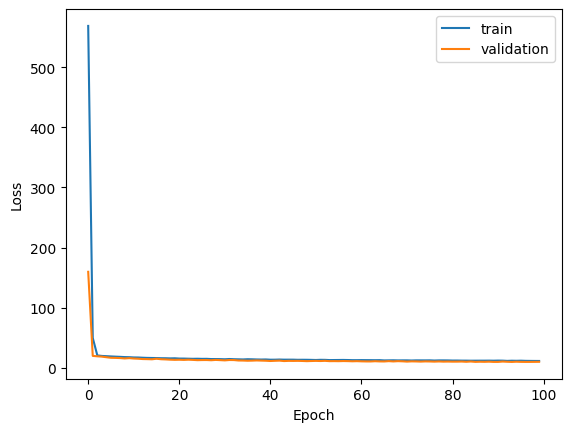

In [65]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Load data (Assuming df is your DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Remove rows with NaN values in the 'Energy' column
df_clean = df.dropna(subset=['Energy'])

# Define features (X) and target (y)
X = df_clean.drop(columns=['Energy'])
y = df_clean['Energy']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_data=(X_val_scaled, y_val))

# Evaluate the model
y_val_pred = model.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_val_pred)

print(f"Mean Squared Error on the validation set: {mse}")

# plot the history of the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
submission = pd.load_csv('..\..\Dataset\submission.csv')


In [66]:
# get only the row that is NaN in the 'Energy' column

df_pred = df[df['Energy'].isna()]
df_pred = df_pred.drop(columns=['Energy'], axis=1)
df_pred.reset_index(inplace=True, drop=True)
df_pred

,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Hour,Month
0,0,0,0.189872,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,6,1
1,0,0,0.522096,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,11,1
2,0,0,0.439968,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,12,1
3,0,0,0.482723,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,13,1
4,0,0,0.782511,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27486,105,3,0.089250,0.0,0.0,0.0,1,2,426.98,2,2,6.877429,7,2
27487,105,3,0.119096,0.0,0.0,0.0,1,2,426.98,2,2,6.877429,8,2
27488,105,3,0.070423,0.0,0.0,0.0,1,2,426.98,2,2,6.877429,11,2
27489,105,3,0.165231,0.0,0.0,0.0,1,2,426.98,2,2,6.877429,20,2


In [67]:
# predic value of 'Energy' column

X_pred_scaled = scaler.transform(df_pred)
y_pred = model.predict(X_pred_scaled)

# insert the predicted value to the 'Energy' column

df_pred['Energy'] = y_pred
df_pred


860/860 [==============================] - 3s 3ms/step


,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Hour,Month,Energy
0,0,0,0.189872,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,6,1,59.482468
1,0,0,0.522096,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,11,1,71.219681
2,0,0,0.439968,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,12,1,67.720741
3,0,0,0.482723,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,13,1,69.952034
4,0,0,0.782511,0.0,0.0,0.0,1,2,365.00,20,4,6.875934,23,1,83.239746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27486,105,3,0.089250,0.0,0.0,0.0,1,2,426.98,2,2,6.877429,7,2,60.590439
27487,105,3,0.119096,0.0,0.0,0.0,1,2,426.98,2,2,6.877429,8,2,67.666740
27488,105,3,0.070423,0.0,0.0,0.0,1,2,426.98,2,2,6.877429,11,2,62.833805
27489,105,3,0.165231,0.0,0.0,0.0,1,2,426.98,2,2,6.877429,20,2,78.502274


In [68]:
df_submit = backup.copy()
df_submit = df_submit[df_submit['Energy'].isna()]
df_submit.reset_index(inplace=True, drop=True)

df_submit['Time'] = pd.to_datetime(df_submit['Time'])
df_submit['ID'] = df_submit['Time'].astype(str) + '_B_' + df_submit['BS'].astype(str) 
df_submit = df_submit[['ID']]
df_submit

,ID
0,2023-01-01 06:00:00_B_0
1,2023-01-01 11:00:00_B_0
2,2023-01-01 12:00:00_B_0
3,2023-01-01 13:00:00_B_0
4,2023-01-01 23:00:00_B_0
...,...
27486,2023-01-02 07:00:00_B_105
27487,2023-01-02 08:00:00_B_105
27488,2023-01-02 11:00:00_B_105
27489,2023-01-02 20:00:00_B_105


In [69]:
# join df_submit with df_pred

df_sub = pd.merge(df_submit, df_pred, left_index=True, right_index=True)
df_sub = df_sub[['ID', 'Energy']]
df_sub

,ID,Energy
0,2023-01-01 06:00:00_B_0,59.482468
1,2023-01-01 11:00:00_B_0,71.219681
2,2023-01-01 12:00:00_B_0,67.720741
3,2023-01-01 13:00:00_B_0,69.952034
4,2023-01-01 23:00:00_B_0,83.239746
...,...,...
27486,2023-01-02 07:00:00_B_105,60.590439
27487,2023-01-02 08:00:00_B_105,67.666740
27488,2023-01-02 11:00:00_B_105,62.833805
27489,2023-01-02 20:00:00_B_105,78.502274


In [70]:
df_sub.to_csv('nn_regression_submissions\SampleSubmission_02.csv', index=False)
print(df_sub.shape)

(27491, 2)


In [46]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Load data (Assuming df is your DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Separate rows with NaN values in 'Energy' column
df_nan = df[df['Energy'].isna()]
df_clean = df.dropna(subset=['Energy'])

# Define features (X) and target (y)
X = df_clean.drop(columns=['Energy'])
y = df_clean['Energy']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_nan_scaled = scaler.transform(df_nan.drop(columns=['Energy']))

# Initialize the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=128, validation_data=(X_val_scaled, y_val))

# # Evaluate the model on the validation set
# y_val_pred = model.predict(X_val_scaled)
# val_mse = mean_squared_error(y_val, y_val_pred)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)

# # Predict the missing Energy values
# predicted_energy = model.predict(X_nan_scaled)

# # Insert the predicted values back into the original DataFrame
# df.loc[df['Energy'].isna(), 'Energy'] = np.squeeze(predicted_energy)

print(f"Mean Squared Error on the validation set: {val_mse}")
print(f"Mean Squared Error on the test set: {test_mse}")

# Now, df should have the missing 'Energy' values filled in.


Epoch 1/10
537/537 [==============================] - 2s 3ms/step - loss: 129.8983 - val_loss: 32.7366
Epoch 2/10
537/537 [==============================] - 1s 2ms/step - loss: 27.8751 - val_loss: 25.3595
Epoch 3/10
537/537 [==============================] - 1s 2ms/step - loss: 22.4018 - val_loss: 21.7474
Epoch 4/10
537/537 [==============================] - 1s 2ms/step - loss: 19.9408 - val_loss: 19.6828
Epoch 5/10
537/537 [==============================] - 1s 2ms/step - loss: 18.8178 - val_loss: 18.9098
Epoch 6/10
537/537 [==============================] - 1s 2ms/step - loss: 18.1745 - val_loss: 18.5255
Epoch 7/10
537/537 [==============================] - 1s 2ms/step - loss: 17.7974 - val_loss: 18.2745
Epoch 8/10
537/537 [==============================] - 1s 2ms/step - loss: 17.5291 - val_loss: 17.8382
Epoch 9/10
537/537 [==============================] - 1s 2ms/step - loss: 17.2429 - val_loss: 17.7973
Epoch 10/10
460/460 [==============================] - 1s 1ms/step
Mean Squared E

In [47]:
predicted_energy = model.predict(X_nan_scaled)
predicted_energy

860/860 [==============================] - 1s 1ms/step


array([[52.31127 ],
       [69.453255],
       [66.50757 ],
       ...,
       [58.940605],
       [66.66067 ],
       [55.837646]], dtype=float32)

In [54]:
sub

,Time,BS,Energy,w
0,2023-01-01 06:00:00,B_0,NaN,1
1,2023-01-01 11:00:00,B_0,NaN,1
2,2023-01-01 12:00:00,B_0,NaN,1
3,2023-01-01 13:00:00,B_0,NaN,1
4,2023-01-01 23:00:00,B_0,NaN,1
...,...,...,...,...
26134,2023-01-02 19:00:00,B_1019,NaN,5
26135,2023-01-02 20:00:00,B_1019,NaN,5
26136,2023-01-02 21:00:00,B_1019,NaN,5
26137,2023-01-02 22:00:00,B_1019,NaN,5


In [55]:
sub = pd.read_csv('..\..\Dataset\SampleSubmission.csv')
sub['Time'] = pd.to_datetime(sub['Time'], format='%Y-%d-%m %H:%M:%S')
sub['Time']=sub['Time'].apply(lambda x: x.strftime('%Y-%d-%m %H:%M:%S')).astype(str) + '_B_' + sub['BS'].astype(str)
sub['Energy']=predicted_energy
sub

ValueError: Length of values (27491) does not match length of index (26139)

In [31]:
df.Month.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125575 entries, 0 to 125574
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125575 non-null  object 
 1   BS         125575 non-null  object 
 2   CellName   125575 non-null  object 
 3   load       125575 non-null  float64
 4   ESMode1    125575 non-null  float64
 5   ESMode2    125575 non-null  float64
 6   ESMode3    125575 non-null  float64
 7   ESMode4    125575 non-null  int64  
 8   ESMode5    125575 non-null  float64
 9   ESMode6    125575 non-null  float64
 10  RUType     125575 non-null  object 
 11  Mode       125575 non-null  object 
 12  Frequency  125575 non-null  float64
 13  Bandwidth  125575 non-null  int64  
 14  Antennas   125575 non-null  int64  
 15  TXpower    125575 non-null  float64
 16  Energy     98084 non-null   float64
dtypes: float64(9), int64(3), object(5)
memory usage: 16.3+ MB


In [16]:
125575-98084

27491